***
# HEICODERS ACADEMY
<b>AI300: Deploying Machine Learning Models</b><br>
***
<b>Lesson 2:</b> Advanced SQL and Integrating MySQL with Python [Instructor Notebook]
***

<b>Learning Outcomes:</b>

- Learn how to integrate MySQL with Python

1.Integrating MySQL with Python
===

1a. Concept of Integrating MySQL with Python
---

SQL and Python are indispensable tools for data practitioners to work effectively with data.

A common use case would be the initial retrieval of data from relational databases using SQL queries, followed by subsequent manipulation and analysis of the data in Python with libraries such as pandas.

But did you know that these two seemingly isolated tasks can be combined into a single Python script to easily deliver the same outcome?

<div class="alert alert-block alert-warning">
In this notebook, we discover the concepts and implementation of PyMySQL for connecting to and interacting with MySQL databases from Python.
</div>

1b. Code Implementation for Integrating MySQL with Python
---

Before we begin, we need to download the library to make MySQL queries via Python - <b>PyMySQL</b>. PyMySQL is a pure-Python MySQL client library, which means it is a Python package that creates an API interface for us to access MySQL relational databases.

It means PyMySQL was developed based on the Python Database API Specification, which was set to promote standardization of Python modules used for database access. The two reasons for using PyMySQL is that:

- it serves as a handy interface to interact directly with MySQL databases by incorporating SQL statements within the confines of Python scripts.
- it also means we do not require access to a separate RDBMS interface for running SQL queries needed for our downstream Python operations.

<b>1b.i) Installation</b>

In [ ]:
!pip install PyMySQL

<b>1b.ii) Import packages</b>

In [1]:
import pymysql
import pandas as pd

<b>1b.iii)  Configure database settings
    
Before interacting with the MySQL database, we must connect to the server. The first step is to define the configuration parameters.

Here are our default configuration settings to connect to a local database instance. Note that these values may vary depending on the specific settings you created for your schema and database.
    

In [2]:
import pymysql

ENDPOINT = '127.0.0.1'
PORT = 3306
USERNAME = 'root'
DBNAME = 'car_insurance'
PASSWORD = ''   # Default password is empty. Do change this if you had previously set a password.
CURSORCLASS = pymysql.cursors.DictCursor

<b>1b.iv) Establishing Connecting with the server</b>

With the configuration parameters defined, we can parse them into a PyMySQL connect method call, which can be wrapped within a Python function. The PyMySQL library is built upon two key Python objects: connection objects and cursor objects.

- <b>Connection</b> Object: Creates access to the MySQL database
- <b>Cursor</b> Object: Executes SQL queries to communicate with the MySQL database, e.g., fetch database records, and call procedures.

In [3]:
# Define function to establish MySQL database (local) connection
def initiate_local_connection():
    try:
        connection = pymysql.connect(host=ENDPOINT,
                                     port=PORT,
                                     user=USERNAME,
                                     passwd=PASSWORD,
                                     db=DBNAME,
                                     cursorclass=CURSORCLASS)
        print('[+] Local Connection Successful')
    except Exception as e:
        print(f'[+] Local Connection Failed: {e}')
        connection = None

    return connection

<b>1b.v) Executing the Connection</b>

We then execute the connection by calling the Python function and returning the connection object as a variable:

In [4]:
# Call function and return the connection object
connection = initiate_local_connection()

[+] Local Connection Successful


<b>1b.vi) Retrieving Data from MySQL Database</b>

Let's say we would like to extract a subset of the data (i.e., customers who drive BMW) from the customers table. We first define a function that does the following:

- Create a cursor object from the connection object set up earlier.
- Parse SQL query into the cursor object and execute the query. For this example, the query is SELECT * FROM customers WHERE car_make = 'BMW';, which we store as a string inside a Python variable called query.
- Commit the execution to the connection object for the query to reach the database. It is because the connection object does not automatically commit by default.
- Fetch all the data records resulting from the SQL query that was executed.
- Convert the data records (which are returned as a list of dictionaries) into a pandas DataFrame.

The above steps are wrapped in the Python function (get_records) shown below:

In [5]:
# Define SQL query
sql_query = f'SELECT * FROM address;'

def get_records(sql_query):
    try:
        with connection.cursor() as cursor:
            cursor.execute(sql_query)

        # Connection is not autocommit by default, so we must commit to save changes
        connection.commit()
        
        # Fetch all the records from SQL query output
        results = cursor.fetchall()
        
        # Convert results into pandas dataframe
        df = pd.DataFrame(results)
        
        print(f'Successfully retrieved records')
        
        return df
        
    except Exception as e:
        print(f'Error encountered: {e}')

Running the function returns the following output:

In [6]:
df = get_records(sql_query)
df

Successfully retrieved records


,address_id,state,city
0,A1,Georgia,Decatur
1,A2,California,San Francisco
2,A3,Texas,Dallas
3,A4,District of Columbia,Washington
4,A5,Tennessee,Nashville
...,...,...,...
995,A996,New Jersey,Trenton
996,A997,Florida,Miami
997,A998,California,San Jose
998,A999,Louisiana,Baton Rouge


<div class="alert alert-block alert-warning">
Now that the records from the SQL query are stored as a Python pandas dataframe, we are free to perform a myriad of analysis and manipulation techniques on the data using the pandas techniques we learnt in AI200.
</div>

1c. Code Implementation for Integrating MySQL with Python [Student Exercise]
---

<br>

<div class="alert alert-block alert-info">
    
<b>User story:</b><br>
- You were tasked by the head of data science team to connect to the database, and thereafter perform a join of the insurance_claims table on the vehicle table.
- In this query, you should only return records where the claim amount is more than 3000
- See expected output below <br><br>

<div style="margin-left:30px;background:white;">
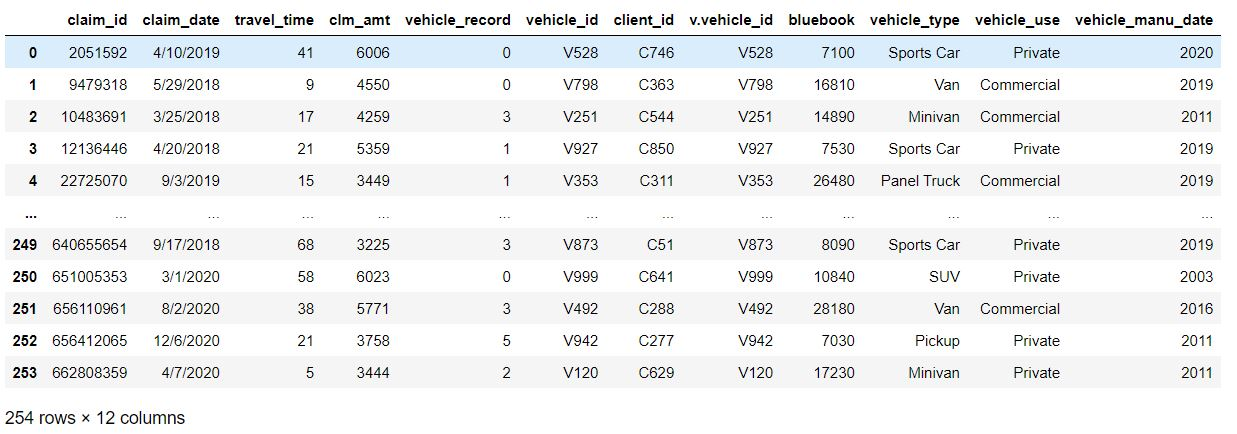
</div>
</div>

In [7]:
# Define SQL query
sql_query = f'SELECT * FROM insurance_claims ic LEFT JOIN vehicle v ON ic.vehicle_id = v.vehicle_id where clm_amt > 3000;'

# Get the records
df = get_records(sql_query)
df

Successfully retrieved records


,claim_id,claim_date,travel_time,clm_amt,vehicle_record,vehicle_id,client_id,v.vehicle_id,bluebook,vehicle_type,vehicle_use,vehicle_manu_date
0,2051592,4/10/2019,41,6006,0,V528,C746,V528,7100,Sports Car,Private,2020
1,9479318,5/29/2018,9,4550,0,V798,C363,V798,16810,Van,Commercial,2019
2,10483691,3/25/2018,17,4259,3,V251,C544,V251,14890,Minivan,Commercial,2011
3,12136446,4/20/2018,21,5359,1,V927,C850,V927,7530,Sports Car,Private,2019
4,22725070,9/3/2019,15,3449,1,V353,C311,V353,26480,Panel Truck,Commercial,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
249,640655654,9/17/2018,68,3225,3,V873,C51,V873,8090,Sports Car,Private,2019
250,651005353,3/1/2020,58,6023,0,V999,C641,V999,10840,SUV,Private,2003
251,656110961,8/2/2020,38,5771,3,V492,C288,V492,28180,Van,Commercial,2016
252,656412065,12/6/2020,21,3758,5,V942,C277,V942,7030,Pickup,Private,2011


1d. MySQL CRUD functions with Python
---

Besides reading data from MySQL databases, we can also use PyMySQL to perform other CRUD (Create, Read, Update, Delete) functions to manage the database.

For example, we can execute a query that inserts a data record into the customers table. Like before, we create a Python function for this specific operation of data insertion.



In [8]:
# Create INSERT function
def insert_records(address_id, state, city):
    try:
        with connection.cursor() as cursor:
            sql = f"INSERT INTO address (`address_id`, `state`, `city`) \
                                           VALUES (%s, %s, %s);"
            cursor.execute(sql, (address_id, state, city))

        # Connection is not autocommit by default, so we must commit to save changes
        connection.commit()
        print(f'Successfully inserted records')
        
    except Exception as e:
        print(f'Error in insertion to MySQL database: {e}')

We can then execute the above function to insert the data into the database

In [9]:
# Define values to insert into address table (mock data) and thereafter pass it to the function
address_id = 'AA'
state = 'Singapore'
city = 'Singapore'

insert_records(address_id, state, city)

Successfully inserted records


We then make a retrieve query to check if the data was indeed properly inserted into the database

In [10]:
# Define SQL query
sql_query = f'SELECT * FROM address;'

# Retrieve all record
df = get_records(sql_query)
df

Successfully retrieved records


,address_id,state,city
0,A1,Georgia,Decatur
1,A2,California,San Francisco
2,A3,Texas,Dallas
3,A4,District of Columbia,Washington
4,A5,Tennessee,Nashville
...,...,...,...
996,A997,Florida,Miami
997,A998,California,San Jose
998,A999,Louisiana,Baton Rouge
999,A1000,Tennessee,Nashville


1e. MySQL CRUD functions with Python [Student Exercise]
---

<br>

<div class="alert alert-block alert-info">
    
<b>User story:</b><br>
- You were tasked by the head of data science team to write a CRUD function to remove the dummy data that was inserted in the demo earlier
- See expected output below <br><br>

<div style="margin-left:30px;background:white;">
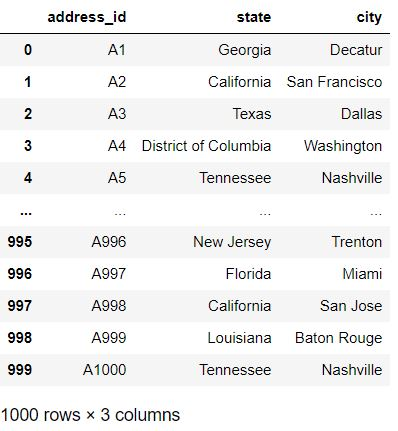
</div>

In [11]:
# Create REMOVE function
def delete_records(query):
    
    try:
        with connection.cursor() as cursor:
            cursor.execute(query)

        # Connection is not autocommit by default, so we must commit to save changes
        connection.commit()
        print(f'Successfully deleted records')
        
    except Exception as e:
        print(f'Error in deletion to MySQL database: {e}')

In [12]:
# Define query to delete record
delete_query = 'DELETE FROM ADDRESS WHERE address_id="AA";'
delete_records(delete_query)

# Define SQL query
select_query = f'SELECT * FROM address;'

# Retrieve all record
df = get_records(select_query)
df

Successfully deleted records
Successfully retrieved records


,address_id,state,city
0,A1,Georgia,Decatur
1,A2,California,San Francisco
2,A3,Texas,Dallas
3,A4,District of Columbia,Washington
4,A5,Tennessee,Nashville
...,...,...,...
995,A996,New Jersey,Trenton
996,A997,Florida,Miami
997,A998,California,San Jose
998,A999,Louisiana,Baton Rouge
